<a href="https://colab.research.google.com/github/sim-mautner/cs1010-22t1/blob/master/lectures/03-python-and-programming-fundamentals/05-modules-and-libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Topic 3<br>
> Python and Programming Fundamentals<br>
> COMP1010 2021 T3<br>
> Week 1-3

> Topic 3.5<br>
> Modules and Libraries

# Modules and Libraries



Why do we have them?

Where can I find more? [PyPI - Python Package Index](https://pypi.org/)

## 1 - Datetime

This section also includes a lot of subtleties about passing parameters into functions.

Can we get the current datetime?


In [1]:
import datetime

today = datetime.datetime.now()
print(today)

2022-03-08 00:09:52.135767


In [2]:
from datetime import datetime

today = datetime.now()
print(today)

2022-03-08 00:10:40.180502


Can we create an object with a specific datetime?

In [4]:
import datetime

other_date = datetime.datetime(2020, 3, 17)
print(other_date)

2020-03-17 00:00:00


Can we print out the current date and time, in the format:

> Today is Wednesday, 30/04/2021

Some useful/common formats:
* %a	Weekday, short version	Wed	
* %A	Weekday, full version	Wednesday		
* %d	Day of month 01-31	31	
* %b	Month name, short version	Dec	
* %B	Month name, full version	December	
* %m	Month as a number 01-12	12	
* %y	Year, short version, without century	18	
* %Y	Year, full version	2018	
* %H	Hour 00-23	17	
* %I	Hour 00-12	05	
* %p	AM/PM	PM	
* %M	Minute 00-59	41	
* %S	Second 00-59	08

([complete list of formats](https://www.w3schools.com/python/python_datetime.asp))

In [8]:
# str f time -> string from time
print(f"Today is {today.strftime('%A, %d/%m/%Y')}.")

Today is Tuesday, 08/03/2022.


As well as `datetime`, there is `date` and `time` if we are only storing the date part or the time part and we don't need the two together.

Can we find the difference between 2 dates?

In [10]:
date_1 = datetime.datetime(2022, 1, 5)
date_2 = datetime.datetime(2022, 2, 17)
# Should give us 31+12=43
print(date_2-date_1)

43 days, 0:00:00


In [11]:
date_1 = datetime.datetime(2021, 1, 5)
date_2 = datetime.datetime(2022, 2, 17)
# Should give us 365+31+12=1 year and 43 days
print(date_2-date_1)

408 days, 0:00:00


A timedelta object represents a duration, the difference between two dates or times.

`datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)`

Can we find the date 10 days after a given date?

In [12]:
ten_days = datetime.timedelta(10)
print(today+ten_days)

2022-03-18 00:10:40.180502


And 5 mintues later?


**Useful Notes**

There are 2 ways we can create a `timedelta` object for 5 minutes:
* `timedelta(0,0,0,0,5)`
* `timedelta(minutes=5)`

The latter is more readable and concise.

We can combine a `date` object with a `time` object into a `datetime` object.

We can create an empty (zeroed) time object using `time()`


In [13]:
five_minutes = datetime.timedelta(minutes=5)
print(today+ten_days+five_minutes)

2022-03-18 00:15:40.180502


In [15]:
day = datetime.date(2022,2,2)
# Need to convert the day into a datetime in order to hold the time as well.
day = datetime.datetime.combine(day, datetime.time())
print(day+five_minutes)

2022-02-02 00:05:00


In [16]:
print(datetime.time())

00:00:00


Can we convert it into a string (to save it into a dictionary or file)?

In [23]:
format = "%d%m%y%H%M%S"
print(type(today))
print(today)
today_string = today.strftime(format)
print(today_string)
format2 = "%d%m%y %H%M%S"
today_string2 = today.strftime(format2)
print(today_string2)

<class 'datetime.datetime'>
2022-03-08 00:10:40.180502
080322001040
080322 001040


Can we convert it back from a string into a datetime object?

In [24]:
today_retrieved = datetime.datetime.strptime(today_string, format)
print(today_retrieved)

2022-03-08 00:10:40


For further information, specifically managing different timezones: https://docs.python.org/3/library/datetime.html

## 2 - Random



* `random.randint(start, stop)` (start and stop are both included in the range)
* `random.choices(sequence, weights=None, cum_weights=None, k=1)`

Write a function which simulates the rolling of a 6-sided dice.

In [36]:
import random

def roll_dice():
    return random.randint(1,6)

for i in range(1,10):
    print(roll_dice())

1
3
2
4
1
1
4
2
1


Writie a function which takes in an integer n, and simulates the rolling of an n-sided dice.

In [37]:
def roll_dice(num_sides):
    return random.randint(1,num_sides)

for i in range(1,10):
    print(roll_dice(42))

3
26
12
14
9
24
22
15
39


Is it possible to flip a weighted coin?

Imagine we have a coin, in which there is 1/3 chance you'll get 'heads' and 2/3 chance you'll get 'tails'.

In [51]:
values = ['H', 'T']
weights = [1, 2] # for every one heads I want 2 tails
results = random.choices(values, weights, k=30)
print(results)
print(f"Heads: {results.count('H')} Tails: {results.count('T')}.")

['H', 'T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'H']
Heads: 12 Tails: 18.


Can we do this 12 times a get a list of the results?

In [ ]:
# See above.

## 3 - Images

Important info:
* An image is a width x height grid of pixels
* Each pixel has a Red, Green, and Blue component

Using the [Pillow](https://python-pillow.org/) library in python allows us to create and manipulate images.

**Note:** This is not something we will be covering in depth in this course, so don't feel you have to memorise how to manipulate images.

In [52]:
!pip install Pillow

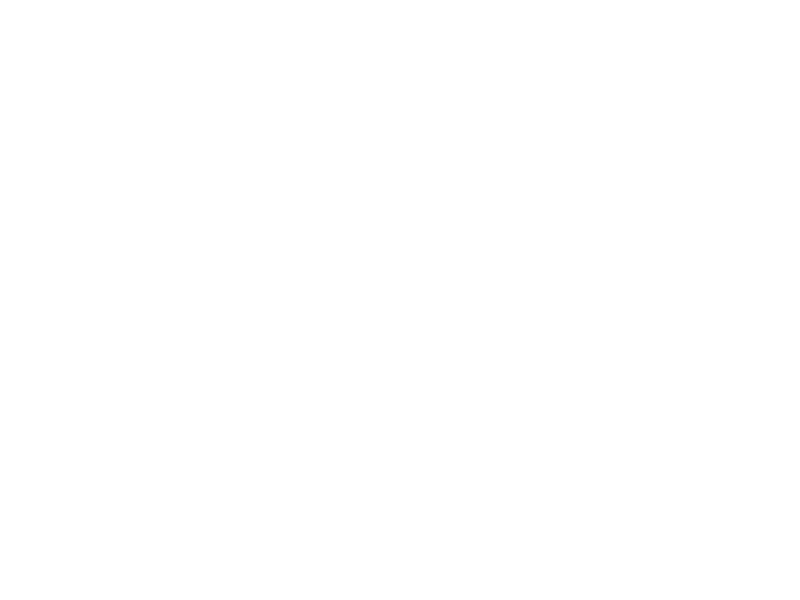

In [53]:
from PIL import Image

im = Image.new(mode="RGB", size=(800,600), color="white")

im

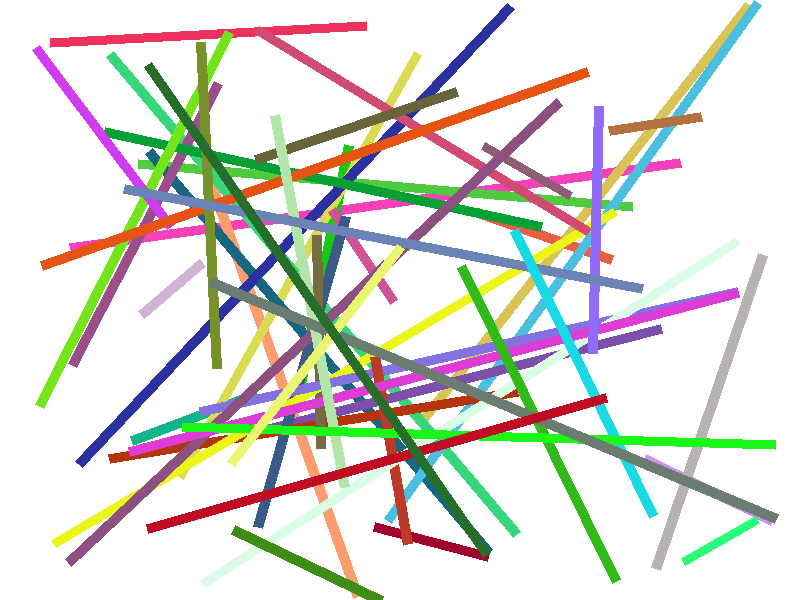

In [61]:
from PIL import Image, ImageDraw

im = Image.new(mode="RGB", size=(800,600), color="white")

marker = ImageDraw.Draw(im)


#marker.line((0,0,100,100), fill=(255,0,0), width=10)

#marker.line((100,100,200,100), fill=(100, 107, 189), width=10)

for i in range(50):
    start_x = random.randint(0,800)
    start_y = random.randint(0,600)
    end_x = random.randint(0,800)
    end_y = random.randint(0,600)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    marker.line((start_x,start_y,end_x,end_y), fill=(r,g,b), width=10)

im

## 4 - Pandas and Plotly (a detour into Musk tweets)

This code cell creates a list from some of Elon Musk's tweets. 

*You're not expected to completely understand this code yet. It's only here to give us interesting data*.

In [69]:
import pandas

raw_tweets = pandas.read_csv('https://raw.githubusercontent.com/sim-mautner/cs1010-21t3/main/data/elonmusk.csv')
elon_tweets = list(raw_tweets.tweet)

#elon_tweets

How many tweets are there in our dataset?

In [70]:
len(elon_tweets)

9167

In what tweets has Elon Musk said "simulation"?

In [72]:
for tweet in elon_tweets:
    if "simulation" in tweet:
        print(tweet)

Pretty much. We place high value on simulation too, but nothing’s as weird as reality!
Hope you’re enjoying the simulation
8 years later, the simulation is mostly real
Root of energy to mass ratio is max render speed of the simulation
Physics is a set of compression functions for the simulation
Cramer is a simulation. He’s not real.
Uh it’s a simulation hello
Appears to be simulations all the way down
All parameters in a simulation are necessarily quantized
Yes, if there is no listener, a simulation probably wouldn’t spend computing power on sound
To conserve computing power, a simulation would only render an object when it is observed
Second best answer to the Fermi Paradox after the simulation argument
Falcon Heavy launch simulation almost ready. Will be set to Bowie’s Life on Mars.
The singularity for this level of the simulation is coming soon. I wonder what the levels above us look like. 

Good chance they are less interesting and deeper levels are better. So far, even our primiti

What emoji does Elon Musk use?

In [73]:
!pip install emoji

     |████████████████████████████████| 174 kB 12.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=910767ffa66496cef99d86f9f421006ed28242fcefdafbedb7d39cae3b4c3dba
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [75]:
import emoji

elon_emoji = []
for tweet in elon_tweets:
    for character in tweet:
        if character in emoji.UNICODE_EMOJI_ALIAS_ENGLISH:
            elon_emoji.append(character)

print(elon_emoji)

['👀', '👀', '👀', '🔥', '🔥', '🖤', '✨', '✨', '🖤', '🤣', '🤣', '💕', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😂', '😂', '🤣', '🤣', '🤔', '💕', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😢', '🤣', '🤣', '🤣', '🤣', '🐈', '😅', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🎶', '🎶', '🤣', '😉', '😎', '🤣', '🤣', '🚀', '🤣', '🤣', '🖤', '🤣', '💕', '🤣', '🤣', '🤣', '🤣', '🌹', '👻', '🤣', '🤣', '🤣', '💕', '🤣', '🤣', '💕', '😀', '👍', '🤣', '🐝', '🐝', '🤣', '🤣', '🤣', '🤣', '🧚', '👸', '🤣', '🤣', '💕', '🔥', '🤣', '🤣', '🧲', '🤣', '🤣', '🥜', '🤣', '🤣', '🔥', '🤣', '🤣', '👆', '💯', '😅', '🥜', '🔥', '🔥', '🔥', '👍', '🤣', '🤣', '🤣', '🤣', '🤣', '👍', '🤣', '🤣', '😉', '🤣', '🤣', '🤓', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😀', '🤣', '🤣', '😅', '😀', '🐇', '💯', '🤣', '🤣', '😮', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '👍', '😀', '🤔', '🤣', '🤣', '🤣', '🤣', '💖', '🤣', '🤣', '😀', '🤣', '🤣', '👍', '😀', '⚡', '🤣', '🤣', '🤔', '💕', '👀', '🤣', '🤣', '🔭', '🔥', '🔥', '😀', '🤣', '🤣', '😊', '💘', '💘', '😉', '🤹', '🏻', '🤣', '🤣', '💯', '🔥', '🔥', '🤣', '🤣', '💕', '🤣', '🤣', '🤣', '🔥', '🔥', '🔥', '😀',

Can we build a dictionary counting how often Elon Musk uses each Emoji?

In [76]:
'''
smiley: 6
heart: 5
'''

emoji_freq = {}
for an_emoji in elon_emoji:
    if an_emoji not in emoji_freq:
        emoji_freq[an_emoji] = elon_emoji.count(an_emoji)

print(emoji_freq)

{'👀': 4, '🔥': 34, '🖤': 50, '✨': 3, '🤣': 226, '💕': 20, '😂': 2, '🤔': 11, '😢': 5, '🐈': 4, '😅': 8, '🎶': 9, '😉': 28, '😎': 5, '🚀': 38, '🌹': 1, '👻': 5, '😀': 48, '👍': 18, '🐝': 9, '🧚': 3, '👸': 1, '🧲': 2, '🥜': 7, '👆': 1, '💯': 4, '🤓': 1, '🐇': 4, '😮': 2, '💖': 4, '⚡': 5, '🔭': 2, '😊': 3, '💘': 3, '🤹': 1, '🏻': 2, '🕺': 1, '\U0001fa91': 1, '🍻': 1, '🌏': 4, '💨': 15, '😞': 1, '👶': 1, '🚘': 17, '🎥': 2, '🧱': 1, '🐌': 4, '🎄': 3, '🎁': 3, '🐼': 1, '🤞': 1, '🧝': 2, '💛': 7, '😘': 2, '🎃': 1, '🥇': 1, '🍟': 1, '😈': 1, '🧠': 7, '🎤': 1, '🦌': 1, '🦶': 1, '🐐': 2, '💩': 5, '🥧': 2, '💣': 1, '💦': 1, '🥳': 3, '😲': 3, '🤗': 10, '🍀': 4, '😋': 3, '🧐': 1, '👌': 6, '🎩': 2, '🤝': 1, '🐏': 3, '🍷': 1, '👽': 9, '🤖': 3, '🧙': 4, '🦆': 4, '💰': 1, '😇': 2, '🐣': 1, '🧨': 1, '🌌': 2, '😐': 1, '🏴': 1, '😔': 3, '💙': 4, '🍭': 2, '🙏': 3, '😜': 4, '🍁': 1, '🍃': 3, '🍂': 1, '🐍': 3, '💡': 3, '🧦': 2, '💫': 13, '🧀': 1, '🧁': 1, '🦊': 2, '🐜': 2, '😍': 6, '👟': 1, '🤡': 2, '🎼': 2, '🥰': 1, '🐉': 2, '👨': 2, '👩': 1, '⭐': 1, '⛄': 1, '🎅': 1, '💝': 1, '😴': 2, '🍜': 2, '⚾': 1, '🦙': 1, '🛸': 16,

Can we plot it?

In [77]:
!pip install plotly
import plotly.express

plotly.express.bar(x=list(emoji_freq.keys()),y=list(emoji_freq.values()))

What about only the most frequently used ones?

In [81]:
common_emojis = {}
for an_emoji,freq in emoji_freq.items():
    if freq > 10:
        common_emojis[an_emoji] = freq

plotly.express.bar(x=list(common_emojis.keys()),y=list(common_emojis.values()))

# Feedback (Topic 3.5)

[https://forms.gle/Uod5Jpr7AJ2z7cHLA](https://forms.gle/Uod5Jpr7AJ2z7cHLA)

![](https://i.imgur.com/0L50D4L.png)